## Make sure you are checking that your code full runs in your notebook before submitting to Gradescope!
1. Restart your kernel with the refresh button in the top panel below this tab.
2. Run through all your cells one by one, checking to see there are no errors!
3. Read through the Submission and Autograder announcement on Canvas for more details. 

In [1]:
%%capture
import sys
!{sys.executable} -m pip install otter-grader
# Initialize Otter
import otter
grader = otter.Notebook("HW3.ipynb")

In [2]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pycmap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
# all of these just in case I need them, so I don't have to do it again

# Homework #3
**Due Friday Nov. 8th @ 11:59 pm**

**Regrade Request Due Date: Friday Nov. 22nd @ 11:59 pm**

**Objective:** This assignment will give you experience with NumPy genfromtext, Pandas, advanced plotting, and Cartopy.

## **Instructions:**
Read through the following instructions carefully!
### Accessing Class Code and Instructions

1. Create a fork of the class repository in GitHub.

2. Clone this repository into the home directory of your own JupyterHub by running this command:
```git clone your_SSH_URL```

**Our JupyterHub server has trouble remembering the file permissions for our SSH keys. If you get a file permission error with your private ssh key, run the following line of code in your Terminal:**

```chmod 400 ~/.ssh/id_ed25519``` 
<br>

This will change your file permission to the proper permissions that SSH requires.

3. There should now be a "homework_3" directory in the home directory of your JupyterHub. In terminal, change directories into "homework_3". Next, click on the the "homework_3" icon on the filepath hierarchy in the left panel of JupyterHub. If you don't see it, make sure you're in the home folder by clicking the folder icon under the search bar. 

4. Double click the "HW3.ipynb" to open it in a new tab and begin working on the assignment. Read the instructions carefully, and make sure to write your answers in the specified cells. 

5. Make sure to use the answer variable names provided in the starter code. There are autograder tests embedded in the notebook that will check your work when you run the Autograder, and you can which tests you passed/failed after you submit.

6. Edit the **README** file and write your name and UW NetID. Add a paragraph on why the following plots elements (below) are necessary when designing figures (4-5 sentences). (5 points) 

6. As you continue to answer the homework questions and make edits to your code, make sure to regularly update your GitHub repository as well via git add, commit, and push. A good rule of thumb would be to run these git steps anytime you make an addition or change that you don't want to accidentally lose. Generally, you can push once a day to maintain good version control practices. <br>

Also, make sure that your git commands are running without errors before you refresh your GitHub and check your changes. If you are not seeing the updated changes you created in your local JupyterHub directory, check where your status is by this command: <br>
``` git status```

Then, you can see if you made an error with your git add, commit, or push commands.

### Required Plot Elements for Figures
This assignments requires you to create and design figures using `matplotlib`. To practice good plotting practices, each figure will require the following to receive full points:
1) Concise, descriptive title for each figure/subplot
2) Axis labels with units (when possible)
3) Appropriate axis limits (minimum and maximum)
4) Appropriate tick resolution
5) Legend when using different datasets 
6) Appropriate font size (a good range is 12-15)

### Storing your answers
In the code cells where you will write your answers, there will be comments denoting:

"**# your code**"

and 

"**# answer variables**"

You may store any intermediary variables in the **your code** section. If you do not have any intermediary variables, you can leave the "your code" section blank and store your answer directly in the answer variables.
    
### Submitting to GradeScope

1. Add, commit, and push your changes to GitHub via the command line in JupyterHub.

2. Go to the class Gradescope dashboard and submit your personal GitHub repository link to the Homework 3 assignment. If prompted, log in to GitHub.

3. Run the autograder to check if your code runs and if you passed the initial unit tests. You should be able to run the autograder as many times as you want before submitting. Again, double check that your final answers are stored in the provided variable names given in the starter code!

4. Once the autograder has finished running, check that you have submitted the assignment. If you make any more changes to your code after submitting to Gradescope, make sure to push your changes to GitHub and resubmit the assignment on Gradescope. You can submit as many times as you want as there is no maximum submission attempts, but be sure to have your final submission in before the deadline.


### Honor Code

- Complete the assignment by writing and executing text and code cells as specified. For this assignment, do not use any features of Python that have not yet been discussed in the lessons or class sessions.

- Please keep in mind our late work and dropped homework grading policy. Review the syllabus for details.

- You can acknowledge and describe any assistance you've received on this assignment in the specified cell of this HW3 notebook, whether that was from an instructor, classmate (either directly or on Ed Discussion), and/or online resources other than official Python documentation websites like docs.python.org or numpy.org. Alternatively, if you prefer, you may acknowledge assistance at the relevant point(s) in your code using a Python comment (#). 

- Don't forget that you can receive 5 points of extra credit from answering at least one question on [Ed Discussion](https://edstem.org/us/courses/67282)!

## Grade Breakdown
- Question 1: 25 points
- Question 2: 30 points
- Question 3: 30 points
- Best coding practices: 10 points
- README: 5 points

**Total: 100 points**

- Extra Credit: 5 points for answering a question on Ed Discussion

# Question 1: Pandas and CSV Files (25 points)

<div>
<center>
    <img src = "https://i0.wp.com/datalab.marine.rutgers.edu/wp-content/uploads/2020/08/Oregon-Slope-Base-Nutrients_v3-e1597077722888.jpg?w=885&ssl=1"
         width = "500"\>
<center>
</div>

For this exercise we will be examining vertical profiler data from Axial Seamount curated by [Ocean Data Labs](https://datalab.marine.rutgers.edu/data-nuggets/nutrients/).

The figure above shows temperature, salinity, dissolved oxygen, dissolved organic matter, and nitrate depth profiles over a 4 month period in 2017. It was created using the profiler data you will be looking at today. The data will be directly accessed from the Ocean Data Labs website, using the `profiler_url` string in the cell below.


## Instructions 
Write your code and print your answers for Parts 1-4 in the specified cells below. Don't forget to import any necessary packages, and you will only need to import them once throughout your notebook.   
<br>Make sure to utilize the *print()* statements or write your own print statements for your answers at the bottom of each cell and _**use the provided variables to store your final answer!**_ You may name intermediary variables whatever you like, as long as the final answer is stored and printed in the ones we provide in your starter code.

### Part 1
Using Pandas, read the csv file into a DataFrame by its URL (`profiler_url` in cell below) and store it in the `pro_df` answer variable. If you forgot how to do read in a file, read the Pandas [documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). 

Print the names of the columns in this DataFrame and store many rows it has in the `df_rows` answer variable. (5 points)

In [3]:
# URL to read in to pandas, DO NOT change this!
profiler_url = 'https://datalab.marine.rutgers.edu/wp-content/uploads/2020/08/E01_RS03AXPS_Axial_Base_profiler.csv'

In [4]:
# don't forget to print both your answer variables and the outputs that instructions say to print!
## PART 1
print("Part 1)")

# answer variables
pro_df = pd.read_csv(profiler_url) #reading in CSV file
df_rows = len(pro_df) #finding the number of rows in the file, storing at df_rows

# fill in the printing statements
print("Profiler Dataframe Columns:", pro_df.columns)
print("Dataframe has", df_rows,"rows")

Part 1)
Profiler Dataframe Columns: Index(['time', 'Pressure Bin (dbar)', 'Seawater Temperature (deg_C)',
       'Practical Salinity', 'Dissolved Oxygen (umol kg-1)', 'CDOM (ppb)',
       'Nitrate (µmol L-1)'],
      dtype='object')
Dataframe has 305459 rows


### Part 2
Use the `describe()` function to show and display summary parameters (mean, max, std, count, etc.) of each column of the DataFrame. Without hardcoding, store and print the mean value of the "Seawater Temperature (deg_C)" column in the `mean_temp` answer variable. 

If you are having trouble accessing your column, double check that you are spelling the column name exactly as it is stored in the dataframe. You can also use your _tab_ button to autofill. (5 points)

In [5]:
pro_df.describe() # for some reason when I ran this code in the box below, nothing printed,
# so I guess it's going to be here instead. Everything still worked and the autograder 
# accepted it, so idk

,Pressure Bin (dbar),Seawater Temperature (deg_C),Practical Salinity,Dissolved Oxygen (umol kg-1),CDOM (ppb),Nitrate (µmol L-1)
count,305459.000000,305431.000000,305431.000000,305431.000000,291346.000000,22918.000000
mean,107.223408,9.380233,33.234380,234.118226,1.588839,16.995202
std,48.226346,2.618026,0.527346,71.866992,0.280585,11.191222
min,9.000000,6.930000,32.110000,82.020000,0.320000,0.010000
25%,67.000000,7.930000,32.670000,181.510000,1.410000,5.600000
50%,110.000000,8.230000,33.280000,232.820000,1.580000,17.085000
75%,148.000000,9.330000,33.790000,297.610000,1.810000,27.260000
max,194.000000,19.510000,33.940000,365.030000,2.530000,36.580000


In [6]:
## PART 2
print("Part 2)")
# your code

# answer variables
mean_temp = pro_df["Seawater Temperature (deg_C)"].mean() #indexing the column name and average the data in that column

# print statements
print ("The mean seawater temperature is", mean_temp)

Part 2)
The mean seawater temperature is 9.380233178688474


### Part 3
Use the `loc()` function to find all rows of your DataFrame where the "time" column is equal to the string "2017-08-08 17:00:00". Assign those rows to a new DataFrame and store them in the `aug_df` answer variable. 

Repeat for where time is "2017-12-04 17:00:00". Store the resulting subsetted dataframe in the `dec_df` answer variable. Use the `display()` function to print your new, subsetted dataframes. (5 points)

In [7]:
## PART 3
print("Part 3)")
# your code

# answer variables
#pro_df.loc["2017-08-08 17:00:00"]
aug_df = pro_df.loc[pro_df["time"] == "2017-08-08 17:00:00"]
dec_df = pro_df.loc[pro_df["time"] == "2017-12-04 17:00:00"]


# display your new dataframes
print(aug_df)
print(dec_df)

Part 3)
                      time  Pressure Bin (dbar)  Seawater Temperature (deg_C)   
13122  2017-08-08 17:00:00                 11.0                         17.08  \
13123  2017-08-08 17:00:00                 12.0                         17.08   
13124  2017-08-08 17:00:00                 13.0                         17.08   
13125  2017-08-08 17:00:00                 14.0                         17.09   
13126  2017-08-08 17:00:00                 15.0                         17.09   
...                    ...                  ...                           ...   
13293  2017-08-08 17:00:00                182.0                          7.46   
13294  2017-08-08 17:00:00                183.0                          7.45   
13295  2017-08-08 17:00:00                184.0                          7.44   
13296  2017-08-08 17:00:00                185.0                          7.41   
13297  2017-08-08 17:00:00                186.0                          7.32   

       Practical Sa

<!-- BEGIN QUESTION -->

### Part 4
4. Your two new DataFrames contain single water column profiles measured at your selected times. Let's make a figure to compare the water column profiles of temperature, dissolved oxygen, and dissolved organic matter (CDOM). Follow these steps, **and make sure to include all required plot elements listed in the Assignment Instructions (above)**: (10 points)

>a) `Use matplotlib` to make a figure with three subplots. The subplots should be **columns, not rows**. Check the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) if you need help.
	
>b) On the first subplot, plot Seawater Temperature (x-axis) vs. depth* (y-axis) for your two subsetted dataframes. Plot two lines in different colors: one profile for your `aug_df` DataFrame, and the other for your `dec_df` DataFrame. Reverse the y-axis so depth values increase downward.

*_Note: You can assume pressure is a proxy for depth (1dbar = ~1 meter)._

>c) On the second subplot, plot dissolved oxygen vs. depth for the two subsetted dataframes following the same conventions as part b).

>d) On the third subplot, plot CDOM vs. depth for the two subsetted dataframes following the same conventions as part b) and part c).

>e) Add a grid to each of your subplots.

>f) Add a legend to your figure. This can go in any one of your subplots.

>g) In a markdown cell below your plot, describe how dissolved oxygen and CDOM vs. depth profiles vary between the two dates you have plotted (2-3 sentences). 

An example of what your final figure should look like is shown below. You may choose different colors for your dataframes. 

![example](https://i.ibb.co/C1ngKFg/q1-part4.png)

_Type your answer here, replacing this text._

Part 4)


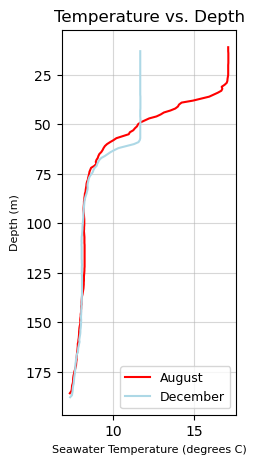

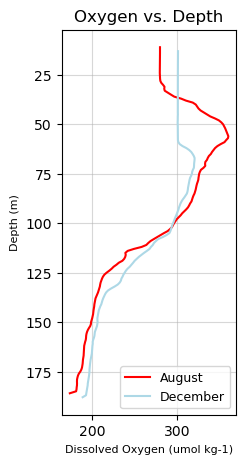

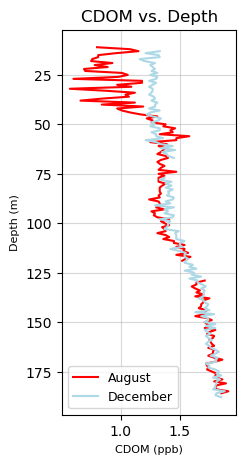

In [8]:
## PART 4
print("Part 4)")
# your code to create your plot

# temp figure
fig1, ax1 = plt.subplots(figsize=(2.25, 5)) #creating blank figure with dimensions that look similar to example
x1 = aug_df["Seawater Temperature (deg_C)"] #setting the x of the line 1 to temp
y1 = aug_df["Pressure Bin (dbar)"] #setting y of line 1 to depth
ax1.plot(x1, y1, c = "red", label = "August") #plotting them against each other
ax1.invert_yaxis() #forgot to invert the axis so here it is
ax1.grid(alpha = 0.5) #also forgot gridlines so bam here they are
ax1.set_xlabel("Seawater Temperature (degrees C)", fontsize = 8) #kachow x axis label
ax1.set_ylabel("Depth (m)", fontsize = 8) #kachow y axis label
ax1.set_title("Temperature vs. Depth", fontsize = 12) #kachow title
x2 = dec_df["Seawater Temperature (deg_C)"] #setting the x for the second line to temp
y2 = dec_df["Pressure Bin (dbar)"] #setting the y for the second line to depth
ax1.plot(x2, y2, c = "#ADD8E6", label = "December") #wham graphing them against each other
# couldn't find a satisfactory light blue so I googled and found this color code, which is PERFECT!
ax1.legend(fontsize=9) #I forgot about my little legend so here it is

#I'm very tired :(

# oxygen figure
fig1, ax1 = plt.subplots(figsize=(2.25, 5))
x3 = aug_df["Dissolved Oxygen (umol kg-1)"]
y3 = aug_df["Pressure Bin (dbar)"]
ax1.plot(x3, y3, c = "red", label = "August")
ax1.invert_yaxis()
ax1.grid(alpha = 0.5)
ax1.set_xlabel("Dissolved Oxygen (umol kg-1)", fontsize = 8)
ax1.set_ylabel("Depth (m)", fontsize = 8)
ax1.set_title("Oxygen vs. Depth", fontsize = 12)
x4 = dec_df["Dissolved Oxygen (umol kg-1)"]
y4 = dec_df["Pressure Bin (dbar)"]
ax1.plot(x4, y4, c = "#ADD8E6", label = "December")
ax1.legend(fontsize=9)

# CDOM figure
fig1, ax1 = plt.subplots(figsize=(2.25, 5))
x3 = aug_df["CDOM (ppb)"]
y3 = aug_df["Pressure Bin (dbar)"]
ax1.plot(x3, y3, c = "red", label = "August")
ax1.invert_yaxis()
ax1.grid(alpha = 0.5)
ax1.set_xlabel("CDOM (ppb)", fontsize = 8)
ax1.set_ylabel("Depth (m)", fontsize = 8)
ax1.set_title("CDOM vs. Depth", fontsize = 12)
x4 = dec_df["CDOM (ppb)"]
y4 = dec_df["Pressure Bin (dbar)"]
ax1.plot(x4, y4, c = "#ADD8E6", label = "December")
ax1.legend(fontsize=9)

<!-- END QUESTION -->

# Question 2: genfromtxt and cartopy (30 points)
PANGAEA is an amazing source of oceanographic data. The database has compiled data from over hundreds of cruises, accumulating to over 419,000 datasets with over 25 billion individual measurements and observations. _Citation_: https://doi.org/10.1038/s41597-023-02269-x.

For this exercise we will be reading and mapping measured surface salinity and temperature data from a 2016 transatlantic cruise from South America to Europe (COLIBRI cruise 35MJ20150607). Source of ship data: https://doi.pangaea.de/10.1594/PANGAEA.865996.

<div>
    <center>
        <img src = "https://i.ibb.co/7bXh4XW/Screen-Shot-2024-10-30-at-1-33-27-PM.png"
             width = "400"/>
    <center>
<div/>

Our data is stored in a text file in the data folder of this repository: "data/35MJ20150607_CO2_underway_SOCATv4.tab"

        
<div style="text-align: left"> 
<h2>Instructions </h2>
Write your code and print your answers for Parts 1-4 in the specified cells below. Don't forget to import any necessary packages, and you will only need to import them once throughout your notebook.
    
<br>Make sure to *print()* for your answers at the bottom of each cell and _**use the provided variables to store your final answer!**_ You may name intermediary variables whatever you like, as long as the final answer is stored and printed in the ones we provide in your starter code.
</div>

### Part 1
Store your filepath as a string in the `cruise_filepath` variable.

Use `readline()` in a loop to print the first 50 rows of `cruise_filepath`. Store how many lines of header are in this text file in the `header_lines` answer varaiable and print the result.

Now, look for the columns. Store the column indices for latitude, longitude, measured salinity (Sal), and measured temperature (Temp [°C]) as a tuple in the `data_cols` variable. Print your answer. (5 points)

In [9]:
print("Part 1)")
# your code

# answer variables
cruise_filepath = "data/35MJ20150607_CO2_underway_SOCATv4.tab" #opening file
header_lines = 35 #counted 35 lines of header
data_cols = [1, 2, 4, 5] #indexes for variables question asked for

file_obj = open(cruise_filepath, "r") #creating file object for the loop
lines = file_obj.readline() #defining lines (reading the lines of the file object)
for i in range(50): 
    line = file_obj.readline()
    print(line)
# I manually counted that there are 35 lines of header stuff before you get to the data

# print statements
print(header_lines)

Part 1)
Citation:	Lefèvre, Nathalie; Diverrès, Denis (2016): Underway physical oceanography and carbon dioxide measurements during COLIBRI cruise 35MJ20150607. Laboratoire d'Océanographie et du Climat: Expérimentation et Approches Numériques, Université Pierre-et-Marie-Curie, France, PANGAEA, https://doi.org/10.1594/PANGAEA.865996, 

	In: Bakker, Dorothee C E; Pfeil, Benjamin; O'Brien, Kevin M; Currie, Kim I; Jones, Steve D; Landa, Camilla S; Lauvset, Siv K; Metzl, Nicolas; Munro, David R; Nakaoka, Shin-Ichiro; Olsen, Are; Pierrot, Denis; Saito, Shu; Smith, Karl; Sweeney, Colm; Takahashi, Taro; Wada, Chisato; Wanninkhof, Rik; Alin, Simone R; Becker, Meike; Bellerby, Richard G J; Borges, Alberto Vieira; Boutin, Jacqueline; Bozec, Yann; Burger, Eugene; Cai, Wei-Jun; Castle, Robert D; Cosca, Catherine E; DeGrandpre, Michael D; Donnelly, Matthew; Eischeid, Greg; Feely, Richard A; Gkritzalis, Thanos; González-Dávila, Melchor; Goyet, Catherine; Guillot, Antoine; Hardman-Mountford, Nicolas J;

### Part 2
2) Use `np.genfromtxt()` to read the latitude, longitude, measured salinity (Sal), and measured temperature (Temp [°C]) columns into a 2-D numpy array of floats. 

Pass in your tuple from Part 1 as the input for the **usecols** argument in the `genfromtxt()` function. Store the resulting 2-D array in the `lat_lon_sal_temp` answer variable and print it. (5 points)

_Optional_: You may also turn your 2-D array into individual 1-D arrays for plotting purposes for parts 3 and 4. 

In [10]:
print("Part 2)")
# your code

# answer variables
lat_lon_sal_temp = np.genfromtxt("data/35MJ20150607_CO2_underway_SOCATv4.tab",
                                 delimiter = "\t", usecols = data_cols, skip_header = header_lines) #consulted google for what characters to use to tell python my delimiter was a tab

# print statements
print(lat_lon_sal_temp)

Part 2)
[[  5.537 -52.371  29.723  27.628]
 [  5.543 -52.366  29.553  27.61 ]
 [  5.55  -52.361  29.375  27.599]
 ...
 [ 50.03   -1.543  35.165  13.335]
 [ 50.033  -1.525  35.157  13.336]
 [ 50.035  -1.508  35.156  13.334]]


<!-- BEGIN QUESTION -->

### Part 3
Use `matplotlib` and `cartopy` to plot longitude, latitude, and salinity on a map. **Include all required and relevant plot elements as described in the Assignment Instructions.** Follow these steps: (10 points)

>a) Make a figure using `matplotlib.pyplot figure()` to set the figure size to (15,8) ([documentation]("https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html")). Set the map projection to **PlateCaree** (check out this [example]("https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/intro.html") from the cartopy documentaion).

>b) Add coastlines to the map, with resolution set to **110m** and color to **black**.

>c) Add OCEAN, LAND, and BORDERS features to the map. Choose appropriate colors for these features.

>d) Add latitude and longitude gridlines and set to **white**.

>e) Make a scatter plot of latitude, longitude, and salinity on your map. Plot longitude in your x-axis, latitude in your y-axis, and salinity as color. Add a colorbar for salinity and label it with units.  

_Optional_: format your latitude and longitude using the `mpl.gridliner` class from `cartopy` ([documentation](https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/gridliner.html) with example)

>f) In a comment or markdown cell below your map, answer the following question: 
>> Do you see any big jumps or anomalies in the salinity data on your map? Where? Why do you think there is/is not a big jump in the data? (2-3 sentences)

Part 3)


Text(0.5, 0, 'Latitude')

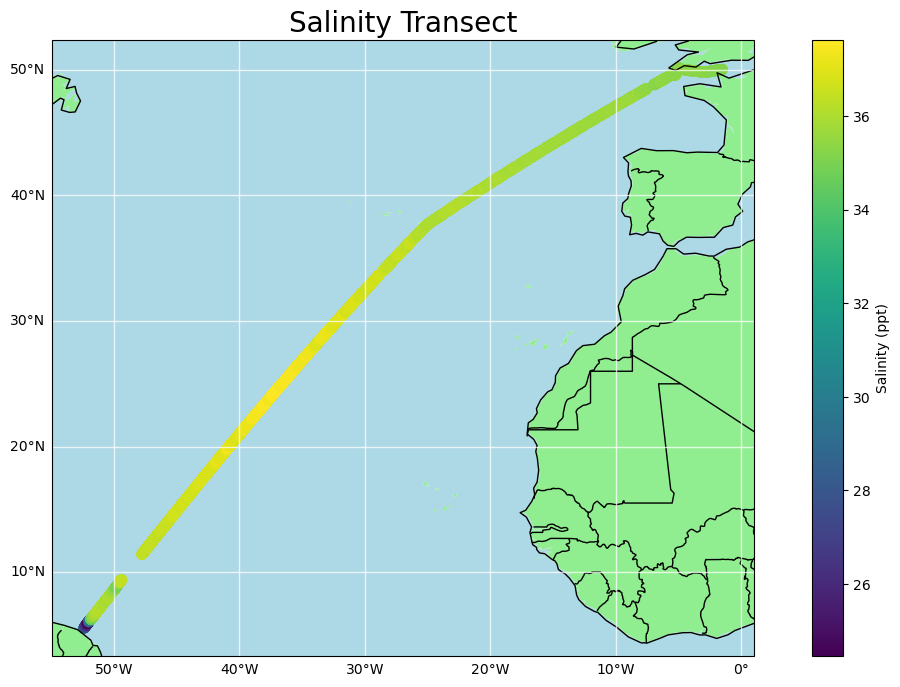

In [11]:
print("Part 3)")
# your code to create your map
latitude = lat_lon_sal_temp[:, 0] #latitude data comes from the array above at index 0
longitude = lat_lon_sal_temp[:, 1] #longitude from array above index 1
salinity = lat_lon_sal_temp[:, 2] #salinity from aray above index 2
fig = plt.figure(figsize=(15,8)) #inserting blank figure
ax = plt.axes(projection = ccrs.PlateCarree()) #telling it what globe projection to use
ax.coastlines(resolution = "110m", color = "black") #adding land
grid = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels = True, color = "white", linewidth = 1, linestyle = "-", alpha = 0.75)
# ^^^ adding latitude gridlines ^^^

#lat lon labels
grid.top_labels = False #turning off top labels
grid.bottom_labels = True #turning on bottom labels
grid.right_labels = False #turning off right labels
grid.left_labels = True #turning on left labels

#adding ocean, land, and country borders
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')  # Ocean blue
ax.add_feature(cfeature.LAND, facecolor='lightgreen')  # Land green
ax.add_feature(cfeature.BORDERS, edgecolor='black')  # Borders black

#adding scatter plot and labels / legends
scatter_plot = ax.scatter(longitude, latitude, c=salinity, cmap = "viridis", s = 50) #scatter data
plt.colorbar(scatter_plot, ax=ax, label="Salinity (ppt)") #adding colorbar
plt.title("Salinity Transect", fontsize = 20) #adding title
plt.ylabel("Longitude", fontsize = 15) #trying to add y label - why won't it show up?
plt.xlabel("Latitude", fontsize = 15) #trying to add x label - why won't it show up?

In [12]:
# Everything looks pretty normal until you get super close to the coast
# of South America, where you see the salinity decrease rapidly. If I 
# had to guess this is due to river input in this area. Throughout the 
# rest of the transect there is unlikely any freshwater influence, but 
# when you get close to the coast of South America you have huge 
# freshwater influence from sources like the Amazon River.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Part 4
Make a second map identical to the first, but plot temperature as color instead of salinity. Answer the following question in a comment or markdown cell below your map (10 points):

> What is the range of temperature throughout this cruise (maximum - minimum)? Would you expect this big or small of a temperature shift in this ocean basin? Why or why not? (2-3 sentences). 

Part 4)


Text(0.5, 0, 'Latitude')

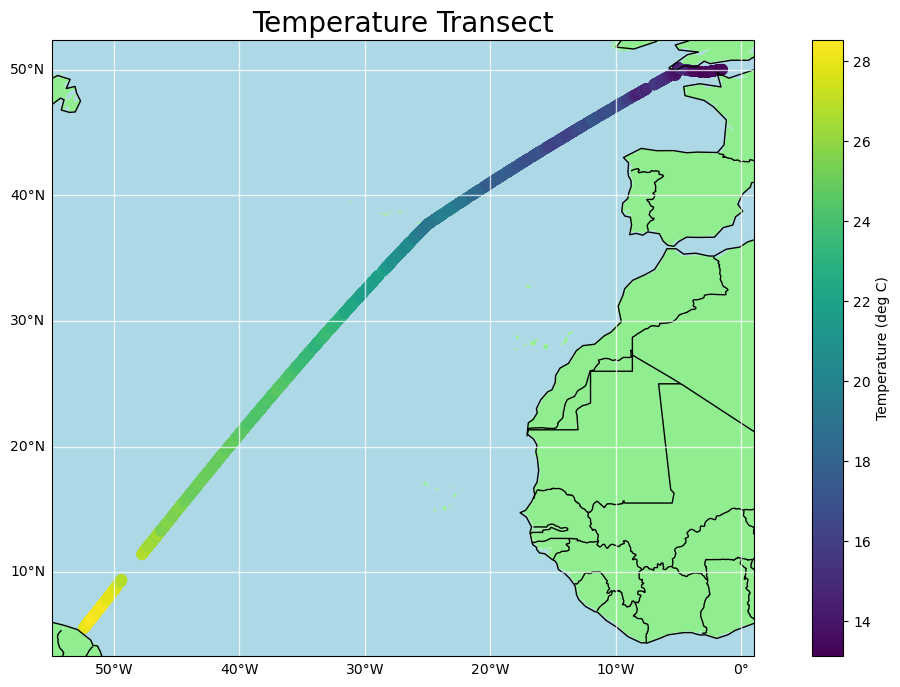

In [13]:
print("Part 4)")
# your code to create your map
latitude = lat_lon_sal_temp[:, 0] #latitude data comes from the array above at index 0
longitude = lat_lon_sal_temp[:, 1] #longitude from array above index 1
temperature = lat_lon_sal_temp[:, 3] #temperature from aray above index 2
fig = plt.figure(figsize=(15,8)) #inserting blank figure
ax = plt.axes(projection = ccrs.PlateCarree()) #telling it what globe projection to use
ax.coastlines(resolution = "110m", color = "black") #adding land
grid = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels = True, color = "white", linewidth = 1, linestyle = "-", alpha = 0.75)
# ^^^ adding latitude gridlines ^^^

#lat lon labels
grid.top_labels = False #turning off top labels
grid.bottom_labels = True #turning on bottom labels
grid.right_labels = False #turning off right labels
grid.left_labels = True #turning on left labels

#adding ocean, land, and country borders
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')  # Ocean blue
ax.add_feature(cfeature.LAND, facecolor='lightgreen')  # Land green
ax.add_feature(cfeature.BORDERS, edgecolor='black')  # Borders black

#adding scatter plot and labels / legends
scatter_plot = ax.scatter(longitude, latitude, c=temperature, cmap = "viridis", s = 50) #scatter data
plt.colorbar(scatter_plot, ax=ax, label="Temperature (deg C)") #adding colorbar
plt.title("Temperature Transect", fontsize = 20) #adding title
plt.ylabel("Longitude", fontsize = 15) #trying to add y label - why won't it show up?
plt.xlabel("Latitude", fontsize = 15) #trying to add x label - why won't it show up?

In [14]:
# I think everything makes sense! The temperature transition is very 
# smooth and linear which makes sense, and also gets much warmer as 
# we move away from the high latitudes of Europe and intot he low 
# latitudes of South America. As the ship approaches the equator, the 
# temperature gets much warmer!

<!-- END QUESTION -->

# Question 3: Xarray and 2-D plotting (30 points)

![offshore plot](https://i.ibb.co/WcJnvnH/question3.png)

This question uses echo sounder data curated by [Ocean Data Labs](https://datalab.marine.rutgers.edu/data-nuggets/zooplankton-eclipse/).


The figure above uses sonar to show diel veritical migration of zooplankton. Zooplankton spend their daylight hours deeper in the water column to avoid visual predators. As the sun sets and the water column darkens, they make their way to the food-rich surface. Sonar using backscattering data to predict where the zooplankton are at a given time. Higher backscattering values correlate to increased biomass. Note in the figure above how the surface shows high backscattering at the surface (dark red), but we can see another layer of lighter blue/green that represents zooplankton moving up and down.

  During an eclipse at ~17:00 on August 21st 2017, as the moon blocked the sun’s light, the zooplankton began their nightly vertical migration through the water column. Once the moon moved passed the sun and light in the water column increase, the zooplankton realized their mistake and swam back down. Note that since the eclipse was such a short event, the zooplankton did not make it all the way to the surface.

For this exercise, we will use xarray and 2-D plotting to examine a subset of this data. We will look specifically at the sonar backscatter data for two hours surrounding the solar eclipse.

## Instructions
Write your code and print your answers for Parts 1-4 in the specified cells below. Don't forget to import any necessary packages, and you will only need to import them once throughout your notebook.

Make sure to *print()* for your answers at the bottom of each cell and _**use the provided variables to store your final answer!**_ You may name intermediary variables whatever you like, as long as the final answer is stored and printed in the ones we provide in your starter code.

### Part 1
1) Your netcdf file is stored in the **data** folder. The filepath string is listed in the starter code cell below this cell. Use the xarray `open_dataset()` function to open the .nc file as an xarray dataset and store the dataset in the `echodata` variable. (1 point)

2) Display your DataSet in the solution cell below. Answer the following subquestions and store/print the answers in the approriate answer variables: (4 points)

>a) Store the _coordinates_ of this DataSet in the `echo_coords` variable below without hardcoding. _HINT:_ Look at the Parameters section of xarray.dataset in the [dataset documentation](https://docs.xarray.dev/en/stable/generated/xarray.Dataset.html) and [here](https://docs.xarray.dev/en/stable/generated/xarray.Dataset.coords.html) on how to access the xarray.Dataset.coords.

>b) Store the _data variables_ of this DataSet in the `echo_vars` variable below without hardcoding. _HINT:_ Check the documentation above and [here](https://docs.xarray.dev/en/stable/generated/xarray.Dataset.data_vars.html) on how to access the xarray.dataset.data_vars.

>c) Store the _dimensions_ of this dataset in the `echo_dims` variable below without hardcoding. _HINT:_  Check the documentation above and [here](https://docs.xarray.dev/en/stable/generated/xarray.Dataset.dims.html) on how to access the xarray.dataset.dims. 

3) In a comment at the bottom of the cell, write which coordinates correspond to the layer, rows, and columns of the `echodata` dataset. (1 point)

    For example, is frequency a layer, row, or a column in `echodata`? What about `ping_time` and `range_bin`? If you're having trouble getting started, try to visualize and draw out on paper what you think the data structure looks like based on the figures in the pre-lecture and lecture slides.

In [15]:
# import engine to run xarray
import netCDF4
# filepath to .nc file (DO NOT CHANGE THIS CODE!)
filepath = "data/OOI-D20170821-T163049_MVBS.nc"
# solution cell below

In [16]:
# Write your code in this solution cell:
print('Part #1)')
print('Step 1)')
# your code

# answer variables
echodata = xr.open_dataset(filepath) #using xarray open_dataset() to open the data
print(echodata) #printing it so I can see what I'm working with

print('Step 2)')
# your code

# answer variables
echo_coords = echodata.coords
echo_vars = echodata.data_vars
echo_dims = echodata.dims

# print statements
print(echo_coords)
print(echo_vars)
print(echo_dims)

print('Step 3)')
## Which coordinates correspond to the layer, rows, and columns?
# Write your answer in a comment:
# Layers: Frequency is the layers of the dataset
    # represents different frequencies where measurements were taken
# Rows: ping_time is the rows of the dataset 
    # represents specific time at which each ping was takem
# Columns: range_bin is the columns of the dataset
    # not sure what this represents

Part #1)
Step 1)
<xarray.Dataset>
Dimensions:              (frequency: 3, ping_time: 593, range_bin: 215)
Coordinates:
  * frequency            (frequency) float32 1.2e+05 3.8e+04 2e+05
  * ping_time            (ping_time) datetime64[ns] 2017-08-21T16:30:53.67760...
  * range_bin            (range_bin) int64 0 1 2 3 4 5 ... 210 211 212 213 214
Data variables:
    MVBS                 (frequency, ping_time, range_bin) float64 ...
    MVBS_range_bin_size  (frequency) float64 ...
Attributes:
    MVBS_ping_size:  10
Step 2)
Coordinates:
  * frequency  (frequency) float32 1.2e+05 3.8e+04 2e+05
  * ping_time  (ping_time) datetime64[ns] 2017-08-21T16:30:53.677600 ... 2017...
  * range_bin  (range_bin) int64 0 1 2 3 4 5 6 7 ... 208 209 210 211 212 213 214
Data variables:
    MVBS                 (frequency, ping_time, range_bin) float64 ...
    MVBS_range_bin_size  (frequency) float64 ...
Frozen({'frequency': 3, 'ping_time': 593, 'range_bin': 215})
Step 3)


### Part 2
1) The different layers of this DataSet are sonar backscatter measurements (MVBS) taken at different frequencies: 38 kHz, 120 kHz, and 200 kHz. The best frequency for detecting zooplankton is 200 kHz, so let's subset our echodataset by the 200 kHz frequency. (2 points)

>a) Select the 200 kHz layer and assign it to the 'echodata_200` answer variable. _HINT:_ how many Hz is 200 kHz?

>b) Display the new DataSet.

2) Extract the ping_time (times), range_bin (depths), and MVBS **values** from your subsetted 200 kHz DataSet and store them as new arrays in the `times`, `depths`, and `MVBS` variables respectively. 
Store and print the shapes of each new array in the `times_shape`, `depths_shape`, and `MVBS_shape` variables. (3 points)

In [17]:
print("Part #2)")
print('Step 1)')
# your code
frequency_200kHz = 200000 #converting kHz to Hz
# answer variables
echodata_200 = echodata.sel(frequency=frequency_200kHz)
# ^^^subsetting the dataset to be only 200kHz

# display new dataset
display(echodata_200)

print("Step 2)")
# your code

# answer variables
times = echodata_200.coords["ping_time"].values
times_shape = times.shape
depths = echodata_200.coords["range_bin"].values
depths_shape = depths.shape
MVBS = echodata_200["MVBS"].values
MVBS_shape = MVBS.shape

# print statements
print("Time shape:", times_shape)
print("Depths shape:", depths_shape)
print("MVBS shape:", MVBS_shape)

Part #2)
Step 1)


<xarray.Dataset>
Dimensions:              (ping_time: 593, range_bin: 215)
Coordinates:
    frequency            float32 2e+05
  * ping_time            (ping_time) datetime64[ns] 2017-08-21T16:30:53.67760...
  * range_bin            (range_bin) int64 0 1 2 3 4 5 ... 210 211 212 213 214
Data variables:
    MVBS                 (ping_time, range_bin) float64 ...
    MVBS_range_bin_size  float64 ...
Attributes:
    MVBS_ping_size:  10

Step 2)
Time shape: (593,)
Depths shape: (215,)
MVBS shape: (593, 215)


### Part 3
1) Plot the data using the `matplotlibs.pyplot figure()` and [pcolormesh()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html) functions. **Include all required plot elements.** Use the shapes of the data that from Part 2 to figure out which variables correspond to x, y, and C (color) values. Add a colorbar to the side and a label. Can you see where the zooplankton are based on the backscattering data? (5 points)

2) You may notice your plot looks different than the example plot above. This is because our x-axis and y-axis are flipped compared to the example figure. This means, we need to reshape your MVBS array so that we can plot the data with "ping_time" (time) on the x-axis and "range_bin" (depth) on the y-axis. Do this by following these steps: (9 points)

>a) Flip the MVBS array using `numpy flip()`. (Look up the documentation if you're not sure how to do this!)

>b) Transpose the flipped MVBS array using `numpy transpose()` and store it in the `MVBS_flipT` variable.

>c) Store the shape of the resulting MVBS array in the `MVBS_flipT_shape` variable and print it.

>d) Plot `MVBS_flipT` with "ping_time" on the x-axis, and "range_bins" on the y-axis. Flip the y-axis so that range values increase downward. Include a colorbar to the side and a label.

Part 3)
Step 1)
Step 2


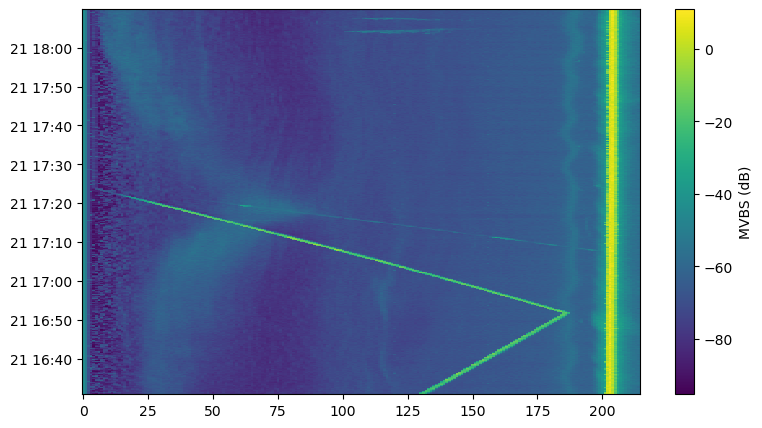

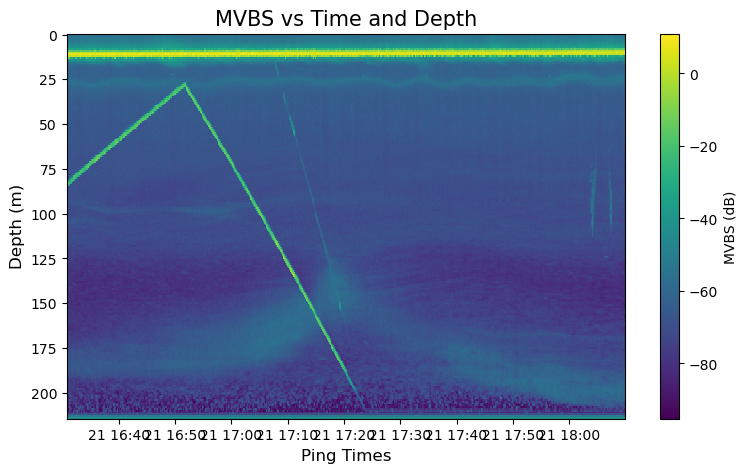

In [87]:
print("Part 3)")
print("Step 1)")
# your code for plotting
fig, ax = plt.subplots(figsize=(9,5)) #importing blank plot
big_fig = ax.pcolormesh(depths, times, MVBS, cmap = "viridis") #filling data into plot with pcolormesh
fig.colorbar(big_fig, label = "MVBS (dB)") #adding a colorbar

print("Step 2")
# your code
flipped_MVBS = np.flip(MVBS, axis = 1) #flipped along axis "ping_time"
# answer variables
MVBS_flipT = flipped_MVBS.transpose() #transposing flipped array
MVBS_flipT_shape = MVBS_flipT.shape #storing resulting array shape

# your code for plotting
fig, ax = plt.subplots(figsize = (9,5)) #importing blank plot
big_fig2 = ax.pcolormesh(times, depths, MVBS_flipT, cmap = "viridis") #filling data into plot with pcolormesh
fig.colorbar(big_fig2, label = "MVBS (dB)") #adding colorbar
ax.set_xlabel("Ping Times", fontsize = 12) #adding x-axis label
ax.set_ylabel("Depth (m)", fontsize = 12) #adding y-axis label
ax.set_title("MVBS vs Time and Depth", fontsize = 15) #adding title
ax.invert_yaxis() #flipping y axis

<!-- BEGIN QUESTION -->

### Part 4
Improve the visibility of the zooplankton migration on your pcolormesh plot from Part 6. You can copy and paste most of your answer from Part 3 here (don't forget the colorbar or other required plot elements!), but adjust the following: (5 points) 

>a) Choose a good colormap from [matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html). Jet is a good example you can try, but try the other color gradients under the "Miscellaneous" section.

>b) Experiment with changing the limits of your colormap. Do this by using `pcolormesh()` named arguments `vmin` and `vmax`, which represent the data range of the colormap. Try to get your plot visibility to look as similar to the example plot in the instructions.

_HINT:_ Try adding/subtracting the standard deviation of the color data from the minimum and maximum of `MVBS_flipT`. How does this change your color scale, and what can you do to improve it? 

Part 4)


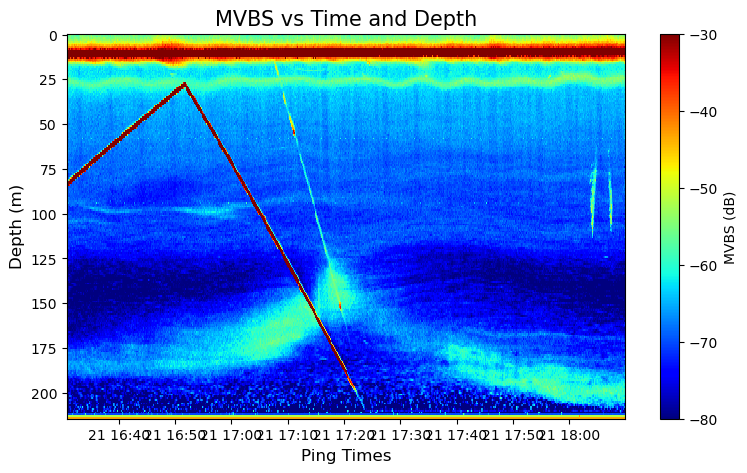

In [88]:
print("Part 4)")
# your code for plotting
flipped_MVBS = np.flip(MVBS, axis = 1) #flipped along axis "ping_time"
# answer variables
MVBS_flipT = flipped_MVBS.transpose() #transposing flipped array
MVBS_flipT_shape = MVBS_flipT.shape #storing resulting array shape
vmin = -80
vmax = -30

# your code for plotting
fig, ax = plt.subplots(figsize = (9,5)) #importing blank plot
big_fig2 = ax.pcolormesh(times, depths, MVBS_flipT, cmap = "jet", vmin = vmin, vmax = vmax) #filling data into plot with pcolormesh
fig.colorbar(big_fig2, label = "MVBS (dB)") #adding colorbar
ax.set_xlabel("Ping Times", fontsize = 12) #adding x-axis label
ax.set_ylabel("Depth (m)", fontsize = 12) #adding y-axis label
ax.set_title("MVBS vs Time and Depth", fontsize = 15) #adding title
ax.invert_yaxis() #flipping y-axis

<!-- END QUESTION -->



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [89]:
grader.check_all()

Question 1 Part 1 results: All test cases passed!

Question 1 Part 2 results: All test cases passed!

Question 1 Part 3 results: All test cases passed!

Question 2 Part 1 results: All test cases passed!

Question 2 Part 2 results: All test cases passed!

Question 3 results: All test cases passed!

Question 3 Part 2 results: All test cases passed!

Question 3 Part 3 results:
    Question 3 Part 3 - 1 message: Check your MVBS_flipT_shape variable!

    Question 3 Part 3 - 1 result:
        ❌ Test case failed
        Trying:
            (np.round(MVBS_flipT[0][0], 3) == -57.198) and (np.round(MVBS_flipT[-1][0], 3)==-43.323)
        Expecting:
            True
        **********************************************************************
        Line 2, in Question 3 Part 3 0
        Failed example:
            (np.round(MVBS_flipT[0][0], 3) == -57.198) and (np.round(MVBS_flipT[-1][0], 3)==-43.323)
        Expected:
            True
        Got:
            False

    Question 3 Part 3 - 2